# 4.3	Inhaltliche Untersuchung des annotierten Goldstandard-Korpus

#### Ziel: inhaltliche Analyse mit Hilfe von N-Grams. Es soll gezeigt werden, dass sich die Ergebnisse von Untersuchungen des Goldstandard-Korpus unterscheiden

## 2. Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
import nltk
from nltk.tokenize import word_tokenize

## 3. Funktionen

In [2]:
def preprocessing_custom(df, column_inputText, newColumnName):
    """
    Uses a dataframe and preprocesses the text in the given column.
    Step 1: replace some chars
    ("\n", " "), ("- ",""), (" -",""), ("-",""), ("''",""), (",,",""), ("„",""), ("ſ", "s"), ("é","e"),
    ("è","e"),("á","a"), ("à","a"), ("⸗-",""), ("⸗ und"," und"), ("⸗ "," "), (" ⸗"," "), ("⸗",""), ("- "," "), ("-",""), (" -"," "),
    ("#"," "), ("⸗\n",""), ("-\n","")
    Step 2: lower all chars in column
    Step 3: remove all punctuation
    Step 4: remove lone letters and additional whitespace
    The following libaries are needed:
    pandas as pd
    """
    #replace some chars
    df[newColumnName] = df[column_inputText].str.replace("-\n","")
    df[newColumnName] = df[newColumnName].str.replace("- "," ")
    df[newColumnName] = df[newColumnName].str.replace(" -"," ")
    df[newColumnName] = df[newColumnName].str.replace("-","")
    df[newColumnName] = df[newColumnName].str.replace("⸗ und"," und")
    df[newColumnName] = df[newColumnName].str.replace("⸗ "," ")
    df[newColumnName] = df[newColumnName].str.replace(" ⸗","")
    df[newColumnName] = df[newColumnName].str.replace("⸗\n","")
    df[newColumnName] = df[newColumnName].str.replace("⸗","")
    df[newColumnName] = df[newColumnName].str.replace("#"," ")
    df[newColumnName] = df[newColumnName].str.replace("\n", " ")
    df[newColumnName] = df[newColumnName].str.replace("'","")
    df[newColumnName] = df[newColumnName].str.replace('"',"")
    df[newColumnName] = df[newColumnName].str.replace(",,","")
    df[newColumnName] = df[newColumnName].str.replace("„","")
    df[newColumnName] = df[newColumnName].str.replace("ſ", "s")
    df[newColumnName] = df[newColumnName].str.replace("é","e")
    df[newColumnName] = df[newColumnName].str.replace("è","e")
    df[newColumnName] = df[newColumnName].str.replace("á","a")
    df[newColumnName] = df[newColumnName].str.replace("à","a")
    
    #lower all words
    df[newColumnName] = df[newColumnName].str.lower()
    # remove all punctuation
    df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
    # remove lone letters and additional whitespace
    df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
    return df

def tokenize(df, column_inputText, newColumnName):
    """
    Needs the following import:
    import nltk
    from nltk.tokenize import word_tokenize
    
    Needs a datframe with a text (string) column
    1. creates a new column
    2. tokenizes the text in the new column
    3. return df
    """
    df[newColumnName] = df[column_inputText].astype(str)
    df[newColumnName] = df[newColumnName].apply(word_tokenize)
    return df


def detokenize(df, column_inputText, newColumnName):
    """
    Needs a dataframe with a tokenized text column (column_inputText)
    1. creates a new column
    2. joins Text in List format to string
    3. return df
    """
    df[newColumnName] = [' '.join(map(str, l)) for l in df[column_inputText]]
    return df


def no_stopwords(df, column_inputText, newColumnName):
    """
    Needs the following import:
    import pandas as pd
    import nltk
    from nltk.tokenize import word_tokenize
    
    Needs a dataframe with tokenized text (list) column and list with stopwords named "stopwords"
    1. creates a new column
    2. reases all the stopwords from the new text column
    3. return df
    """
    stop_words = set(stopwords)
    df[newColumnName] = df[column_inputText].apply(lambda x: [item for item in x if item not in stop_words])
    return df

def plot_top_ngrams_barchart(text, n, plot_headline):
    """
    Needs: 
    text: a string input from a pandas dataframe column 
    n: number to define the word-sequence (as int)
    plot_headline: Define the headline of the bar chart (string)
    Step 1: splits the text and saves everything in a list. 
            Note that all words of the dataframe are put in one list.
    Step 2: uses nltk.utils ngrams() to convert the list to bigrams
    Step 3: convert list to pandas dataframe with all n-grams as strings and their frequencies
    Step 4: saves the top 15 popular bigrams as a new pandas dataframe
    Step 5: visualize the top 15 popular bigrams in bar chart
    The following libaries are needed:
    from nltk.util import ngrams
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    """
    lst_df = text.str.split()
    lst_in_lst = lst_df.values.tolist()
    lst = [word for i in lst_in_lst for word in i]
    
    ngrams_list = list(ngrams(lst, n))
    
    ngrams_dict = {x:ngrams_list.count(x) for x in ngrams_list}
    df_ngrams = pd.DataFrame(list(ngrams_dict.items()), columns=['ngrams', 'Anzahl'])
    df_ngrams["ngrams"] = df_ngrams["ngrams"].astype(str)
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.strip('()')
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace("'","")
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace(",","")
    df_ngrams = df_ngrams.sort_values('Anzahl', ascending=False)
    
    df_popular_ngrams = df_ngrams[:15]
    y = df_popular_ngrams["Anzahl"]
    x = df_popular_ngrams["ngrams"]
    plt.figure(figsize=(10,12))
    sns.barplot(x=y,y=x)
    plt.title(plot_headline, fontsize = 20)
    plt.xlabel("Anzahl der ngrams", fontsize = 14)
    plt.ylabel("Top 15 der ngrams in Stellenanzeigen", fontsize = 14)

## 3. Erstellung eines Datensets

### 3.1. Datenimport

#### Import des annotierten Samples aus Notebook 4.2

In [3]:
df = pd.read_csv('../output/4.2_sample_für_annotation_ground_truth/ground_truth_sample_manuell_annotiert.csv', sep =',')
df.head()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848"
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446


#### Import der Stopwords als Liste

In [4]:
with open('../input/stopwords.txt') as f:
        stopwords = f.read().splitlines()

### 3.2. Daten Normalisierung 

#### Stellenbeschreibung

In [5]:
columnname = "stellenbeschreibung"

In [6]:
df.head()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848"
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446


In [7]:
df = preprocessing_custom(df, columnname, columnname+"_nP")
df = tokenize(df, columnname+"_nP", columnname+"_Tokens")
df = no_stopwords(df, columnname+"_Tokens", columnname+"_nSW_Tokens")
df = detokenize(df, columnname+"_nSW_Tokens", columnname+"_nSW")

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5160/2210848250.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5160/2210848250.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


In [8]:
df.head()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung,stellenbeschreibung_nP,stellenbeschreibung_Tokens,stellenbeschreibung_nSW_Tokens,stellenbeschreibung_nSW
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...,kinderloses ehepaar sucht hausbesorgerposten,"[kinderloses, ehepaar, sucht, hausbesorgerposten]","[kinderloses, ehepaar, sucht, hausbesorgerposten]",kinderloses ehepaar sucht hausbesorgerposten
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852,bürstenmachergehilfen bohrer drechsler einzieh...,"[bürstenmachergehilfen, bohrer, drechsler, ein...","[bürstenmachergehilfen, bohrer, drechsler, ein...",bürstenmachergehilfen bohrer drechsler einzieh...
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349,maschinnäherin welche sich auch zu anderen arb...,"[maschinnäherin, welche, sich, auch, zu, ander...","[maschinnäherin, welche, anderen, arbeiten, ve...",maschinnäherin welche anderen arbeiten verwend...
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848",fabriksbuchhalterin wird bei hohem gehalt sofo...,"[fabriksbuchhalterin, wird, bei, hohem, gehalt...","[fabriksbuchhalterin, hohem, gehalt, sofort, a...",fabriksbuchhalterin hohem gehalt sofort aufgen...
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446,militärkappenmacher oder kappennäherin werden ...,"[militärkappenmacher, oder, kappennäherin, wer...","[militärkappenmacher, kappennäherin, sofort, g...",militärkappenmacher kappennäherin sofort gesuc...


#### Kommunikationsbeschreibung

In [9]:

columnname = "kommunikationsbeschreibung"

In [10]:
df = preprocessing_custom(df, columnname, columnname+"_nP")
df = tokenize(df, columnname+"_nP", columnname+"_Tokens")
df = no_stopwords(df, columnname+"_Tokens", columnname+"_nSW_Tokens")
df = detokenize(df, columnname+"_nSW_Tokens", columnname+"_nSW")

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5160/2210848250.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace('[^\w\s]','')
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5160/2210848250.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[newColumnName].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


In [11]:
df.head()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung,stellenbeschreibung_nP,stellenbeschreibung_Tokens,stellenbeschreibung_nSW_Tokens,stellenbeschreibung_nSW,kommunikationsbeschreibung_nP,kommunikationsbeschreibung_Tokens,kommunikationsbeschreibung_nSW_Tokens,kommunikationsbeschreibung_nSW
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...,kinderloses ehepaar sucht hausbesorgerposten,"[kinderloses, ehepaar, sucht, hausbesorgerposten]","[kinderloses, ehepaar, sucht, hausbesorgerposten]",kinderloses ehepaar sucht hausbesorgerposten,im xvi oder xvii bezirk zuschriften unter post...,"[im, xvi, oder, xvii, bezirk, zuschriften, unt...","[xvi, xvii, bezirk, zuschriften, postlagernd, ...",xvi xvii bezirk zuschriften postlagernd xvi th...
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852,bürstenmachergehilfen bohrer drechsler einzieh...,"[bürstenmachergehilfen, bohrer, drechsler, ein...","[bürstenmachergehilfen, bohrer, drechsler, ein...",bürstenmachergehilfen bohrer drechsler einzieh...,xiv reindorfgasse 35 4852,"[xiv, reindorfgasse, 35, 4852]","[xiv, reindorfgasse, 35, 4852]",xiv reindorfgasse 35 4852
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349,maschinnäherin welche sich auch zu anderen arb...,"[maschinnäherin, welche, sich, auch, zu, ander...","[maschinnäherin, welche, anderen, arbeiten, ve...",maschinnäherin welche anderen arbeiten verwend...,ii vereinsgasse 27 349,"[ii, vereinsgasse, 27, 349]","[ii, vereinsgasse, 27, 349]",ii vereinsgasse 27 349
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848",fabriksbuchhalterin wird bei hohem gehalt sofo...,"[fabriksbuchhalterin, wird, bei, hohem, gehalt...","[fabriksbuchhalterin, hohem, gehalt, sofort, a...",fabriksbuchhalterin hohem gehalt sofort aufgen...,xii bez meidlinger hauptstraße 32 9848,"[xii, bez, meidlinger, hauptstraße, 32, 9848]","[xii, meidlinger, hauptstraße, 32, 9848]",xii meidlinger hauptstraße 32 9848
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446,militärkappenmacher oder kappennäherin werden ...,"[militärkappenmacher, oder, kappennäherin, wer...","[militärkappenmacher, kappennäherin, sofort, g...",militärkappenmacher kappennäherin sofort gesuc...,vii kirchengasse 7446,"[vii, kirchengasse, 7446]","[vii, kirchengasse, 7446]",vii kirchengasse 7446


## 4. Daten Export für Voyant Tools

In [12]:
# export all stellenbeschreibungen without stopwords as txt file
with open('../output/4.3_annotiertesKorpus_n-grams/stellenbeschreibung_nSW.txt', 'w', encoding = 'utf-8') as f:
    for rec_index, rec in df.iterrows():
        f.write(rec['stellenbeschreibung_nSW'] + '\n')
# export all kommunikationsbeschreibungen without stopwords as txt file
with open('../output/4.3_annotiertesKorpus_n-grams/kommunikationsbeschreibung_nSW.txt', 'w', encoding = 'utf-8') as f:
    for rec_index, rec in df.iterrows():
        f.write(rec['kommunikationsbeschreibung_nSW'] + '\n')

## N-Gram Analyse

### Stellenbeschreibungen

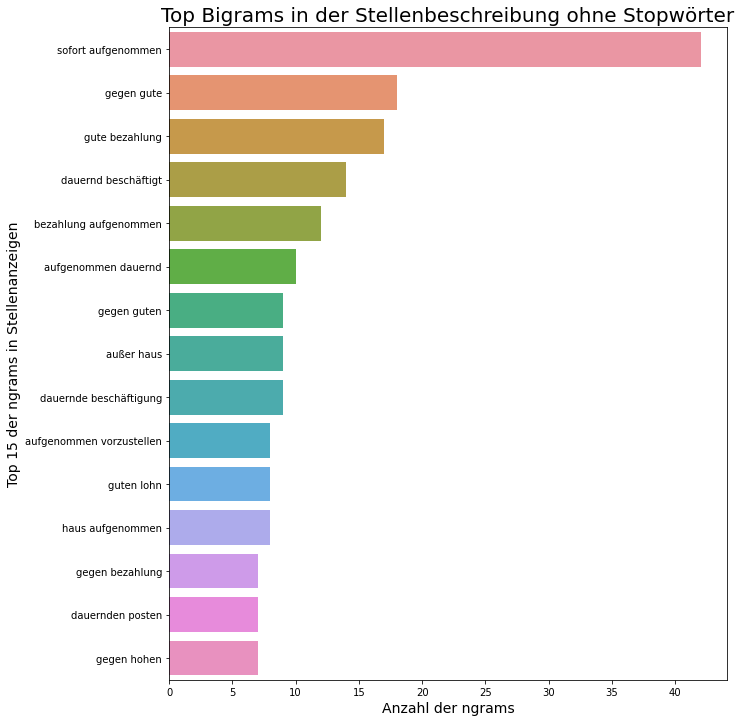

In [13]:
plot_top_ngrams_barchart(df["stellenbeschreibung_nSW"], 2, "Top Bigrams in der Stellenbeschreibung ohne Stopwörter")

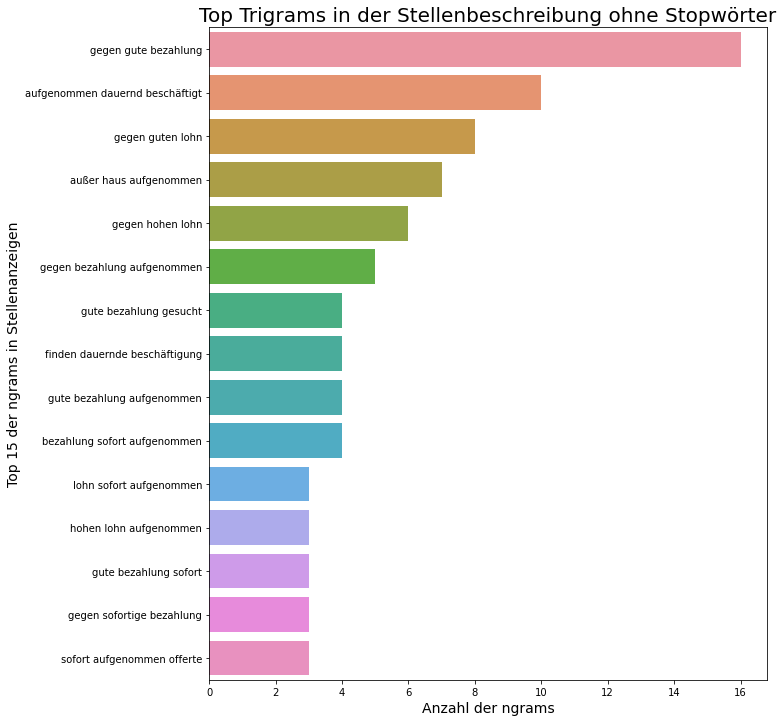

In [14]:
plot_top_ngrams_barchart(df["stellenbeschreibung_nSW"], 3, "Top Trigrams in der Stellenbeschreibung ohne Stopwörter")

### Kommunikationsbeschreibungen

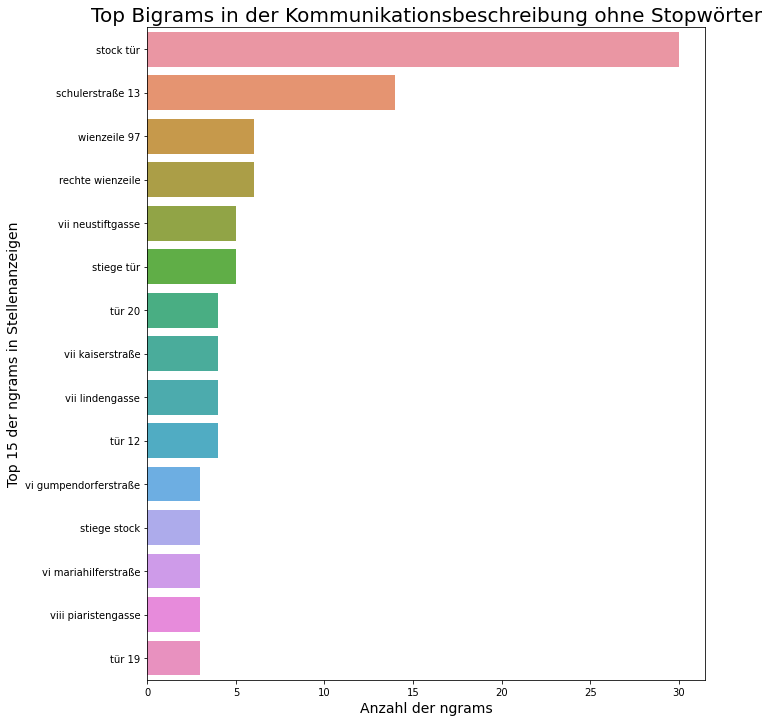

In [15]:
plot_top_ngrams_barchart(df["kommunikationsbeschreibung_nSW"], 2, "Top Bigrams in der Kommunikationsbeschreibung ohne Stopwörter")

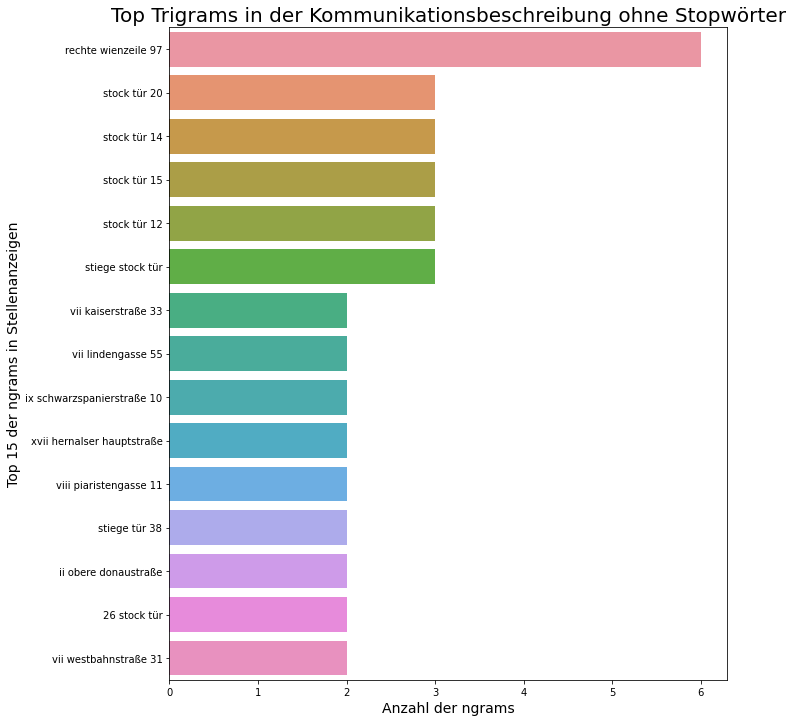

In [16]:
plot_top_ngrams_barchart(df["kommunikationsbeschreibung_nSW"], 3, "Top Trigrams in der Kommunikationsbeschreibung ohne Stopwörter")